Give starting temperature: 1000
Give number of H2 moles:  90
Give number of O2 moles:  1
Starting parameters: 
Temperature:    1000.0 K Pressure:  101325.0 Pa
Volume:       1.0 m^3
     t [s]      T [K]     P [Pa]       u [J/kg]
 1.000e-05   1000.000 101325.000    5.284586e+06
 2.000e-05   1000.000 101325.000    5.284586e+06
 3.000e-05   1000.000 101325.000    5.284586e+06
 4.000e-05   1000.000 101325.000    5.284586e+06
 5.000e-05   1000.000 101325.000    5.284586e+06
 6.000e-05   1000.000 101325.000    5.284586e+06
 7.000e-05   1000.000 101325.000    5.284586e+06
 8.000e-05   1000.000 101325.000    5.284586e+06
 9.000e-05   1000.000 101325.000    5.284586e+06
 1.000e-04   1000.000 101325.000    5.284586e+06
 1.100e-04   1000.000 101325.000    5.284586e+06
 1.200e-04   1000.000 101325.000    5.284586e+06
 1.300e-04   1000.000 101325.000    5.284586e+06
 1.400e-04   1000.000 101325.000    5.284586e+06
 1.500e-04   1000.000 101325.000    5.284586e+06
 1.600e-04   1000.000 101325.000    

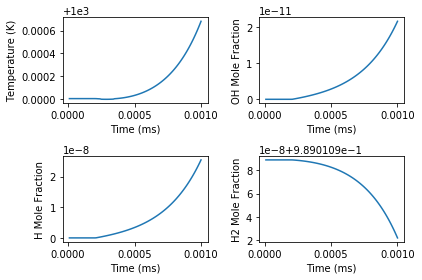

In [179]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct
t_0 = float(input("Give starting temperature: "))
number_H2 = float(input("Give number of H2 moles:  "))
number_O2 = float(input("Give number of O2 moles:  "))


    
gas = ct.Solution('gri30.xml')
    
gas.TPX = t_0, ct.one_atm, {'H2':number_H2, 'O2': number_O2}
   
r = ct.Reactor(gas)
print('Starting parameters: \nTemperature:%10.1f K Pressure:%10.1f Pa\nVolume:%10.1f m^3' % (gas.T, gas.P, r.volume))
sim = ct.ReactorNet([r])
time = 0.0
states = ct.SolutionArray(gas, extra = ['t'])
temperature = []
pressure = []
energy = []
t_zap = 0
print('%10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','u [J/kg]'))
for n in range(100):
    time += 1.e-5

    sim.advance(time)
    temperature.append(gas.T)
    pressure.append(gas.P)
    energy.append(gas.u)
    states.append(r.thermo.state, t = time)
        
    if (temperature[n] - temperature[n-1]) > 300:
        t_zap = temperature[n-1]
        time_zap = states.t[n-1]
    print('%10.3e %10.3f %10.3f  %14.6e' % (sim.time, temperature[n],
                                                pressure[n], energy[n],))


if (temperature[0] - t_0) > 300:
    t_zap = t_0
    time_zap = states.t[0]
if t_zap != 0:           
    print('Combustion temperature %10.3f K : Time of combustion occurance: %10.3e s' % (t_zap, time_zap))
elif temperature[99] - temperature[0] < 0.001:
    print("Combustion will not occure")
else:
    print("Cobustion did not occure during research time")

plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:,gas.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:,gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:,gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()
   
    
